In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

# Intrusion Detection Evaluation Dataset (CIC-IDS2017)
### PortScan Attack Data

Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

[https://www.unb.ca/cic/datasets/ids-2017.html]


In [3]:
# Load Data
df = pd.read_csv("data/CICIDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
X = df

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             286467 non-null  int64  
 1    Flow Duration                286467 non-null  int64  
 2    Total Fwd Packets            286467 non-null  int64  
 3    Total Backward Packets       286467 non-null  int64  
 4   Total Length of Fwd Packets   286467 non-null  int64  
 5    Total Length of Bwd Packets  286467 non-null  int64  
 6    Fwd Packet Length Max        286467 non-null  int64  
 7    Fwd Packet Length Min        286467 non-null  int64  
 8    Fwd Packet Length Mean       286467 non-null  float64
 9    Fwd Packet Length Std        286467 non-null  float64
 10  Bwd Packet Length Max         286467 non-null  int64  
 11   Bwd Packet Length Min        286467 non-null  int64  
 12   Bwd Packet Length Mean       286467 non-nul

In [5]:
X[' Label'].unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [7]:
X.replace('BENIGN', 0, inplace=True)
X.replace('PortScan', 1, inplace=True)

In [8]:
X[' Label'].unique()

array([0, 1])

In [9]:
# Clean Data
if(np.any(np.isnan(X)) or np.all(np.isfinite(X))):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep]

X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


In [12]:
# Scale Data
scaled_features = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000336,1.055296e-02,0.012829,0.012105,0.011466,0.000972,0.032737,0.0,0.019038,0.031022,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000336,1.099472e-02,0.012829,0.012105,0.011466,0.000972,0.032737,0.0,0.019038,0.031022,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000336,1.441667e-06,0.000000,0.000275,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000336,1.086251e-02,0.012829,0.011554,0.011741,0.000928,0.032737,0.0,0.019495,0.031097,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.541314,7.500002e-07,0.000000,0.000550,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_label = X.pop(' Label')
y_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

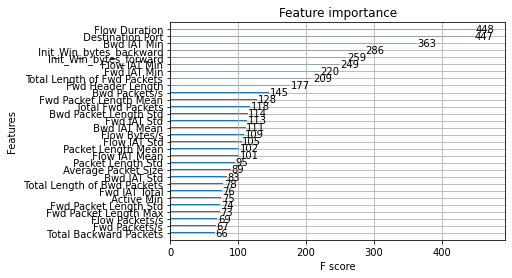

In [14]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

mod = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 5, n_estimators = 600)
mod.fit(X, y_label)
plot_importance(mod, max_num_features=30)
plt.show()

In [15]:
# Important Features
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
reg.fit(X, y_label)

x = {}
# Print the name and gini importance of each feature
for feature in zip(list(X.columns), reg.feature_importances_):
    print(feature)
    x[feature[0]] = feature[1]

(' Destination Port', 0.00015637288139528776)
(' Flow Duration', 9.069194107914689e-05)
(' Total Fwd Packets', 1.5396041708330538e-05)
(' Total Backward Packets', 1.4083784782967761e-05)
('Total Length of Fwd Packets', 0.29236537912368277)
(' Total Length of Bwd Packets', 0.0003137758388398038)
(' Fwd Packet Length Max', 0.28314778879685826)
(' Fwd Packet Length Min', 0.00011526245467696454)
(' Fwd Packet Length Mean', 0.00010891275691954213)
(' Fwd Packet Length Std', 8.315889682011053e-05)
('Bwd Packet Length Max', 3.2600925732122097e-06)
(' Bwd Packet Length Min', 3.0268191169044765e-06)
(' Bwd Packet Length Mean', 7.444285130401127e-06)
(' Bwd Packet Length Std', 0.00016691622796164934)
('Flow Bytes/s', 0.1382695484245808)
(' Flow Packets/s', 0.00014308494325368827)
(' Flow IAT Mean', 0.0005243752408700666)
(' Flow IAT Std', 0.00010468778251029711)
(' Flow IAT Max', 7.8713226574587e-05)
(' Flow IAT Min', 8.389206387920718e-06)
('Fwd IAT Total', 0.00013296162429926942)
(' Fwd IAT Me

In [16]:
# Create training & testing datasets
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# Confusion Matrix
# Precision & Recall
# plot num of bins vs. accuracy, against no bin approach
# Use other datasets

# Using Machine Learning to predict PortScan attacks
created two different classification models, a Support Vector Machine (SVM) and Multilayer Perceptron (MLP) neural network. 
These models will be used as baselines for validating the discretization of the features.

**SVM accuracy score: 99.8%**

**MLP accuracy score: 99.9%**

In [17]:
# Support Vector Machine
from sklearn.svm import LinearSVC
linear_SVC = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    linear_SVC.fit(X_train[train], y_train[train])
    accuracy = linear_SVC.score(X_test[test], y_test[test])
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')
  #  display = PrecisionRecallDisplay.from_estimator(linear_SVC, X_test[test], y_test[test], name="LinearSVC")   
  #  _ = display.ax_.set_title("2-class Precision-Recall curve")

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.9890248164977281,
 Confusion Matrix:
[[56249   599]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9944773589192402,
 Confusion Matrix:
[[30457   311]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Accuracy Score: 0.9995805589052588,
 Confusion Matrix:
[[ 2264    23]
 [    1 54931]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Accuracy Score: 0.9998427095894721,
 Confusion Matrix:
[[ 1861     9]
 [    0 55349]]

train: [     0      1      2 ... 228874 228875 228876],
 test: [228877 228878 228879 ... 286093 286094 286095],
 Accuracy Score: 0.9940229643999371,
 Confusion Matrix:
[[35319   200]
 [  142 21558]]



In [18]:
# MLP Neural Net
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    mlp_clf.fit(X_train[train], y_train[train])
    accuracy = mlp_clf.score(X_test[test], y_test[test])
    loss = mlp_clf.loss_
    print(f'train: {train},\n test: {test},\n Loss: {loss},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Loss: 0.0031029993565082755,
 Accuracy Score: 0.9985844110450891,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Loss: 0.0033593199588538448,
 Accuracy Score: 0.9992135479473602,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Loss: 0.0036671396319328366,
 Accuracy Score: 0.9994407452070116,
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Loss: 0.0035732345462991056,
 Accuracy Score: 0.9999650465754383,
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]

train: [     0      1      2 ... 228874 228875 228876],
 test: [228877 228878 228879 .

# Discretized Dataset
Discretize the same dataset, and run the same models to validate that the predicts can still be acheived using discretized data.

### Bin=5

**SVM accuracy score: 99.8%**

**MLP accuracy score: 98.7%**

In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer

discrete5 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discrete15 = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
discrete20 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
discrete25 = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')

svm_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}
mlp_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [20]:
# SVM 5 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.9887626703949668,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9935161397437914,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Accuracy Score: 0.994949230150824,
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Accuracy Score: 0.9950016602876667,
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]



In [21]:
svm_bin_accuracy

{'5bins': 0.9950016602876667,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [22]:
# MLP Neural Net 5 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 layer size: (100,),
 Loss: 0.019479428105294922,
 Accuracy Score: 0.9882034253757428
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 layer size: (100,),
 Loss: 0.02385975303884748,
 Accuracy Score: 0.9919781890630734
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 layer size: (100,),
 Loss: 0.028043514311351433,
 Accuracy Score: 0.9963124137087331
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]



In [23]:
mlp_bin_accuracy

{'5bins': 0.9963124137087331,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 10

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.84**

In [24]:
# SVM 10bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.9884306186648025,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9936210000174767,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Accuracy Score: 0.9946171726174872,
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Accuracy Score: 0.9950016602876667,
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]



In [25]:
svm_bin_accuracy

{'5bins': 0.9950016602876667,
 '10bins': 0.9950016602876667,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [26]:
# MLP Neural Net 10 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 layer size: (100,),
 Loss: 0.006028230226057233,
 Accuracy Score: 0.9963474309681929
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 layer size: (100,),
 Loss: 0.006822402089344718,
 Accuracy Score: 0.9974833534315525
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 layer size: (100,),
 Loss: 0.008054204651918417,
 Accuracy Score: 0.9978853178140128
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]



In [27]:
mlp_bin_accuracy

{'5bins': 0.9963124137087331,
 '10bins': 0.9978853178140128,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 15

 **SVM Accuracy: 99.85**

**MLP Accuracy: 99.88**

In [28]:
# SVM 15 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.990370499825236,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9937083835788811,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Accuracy Score: 0.994949230150824,
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Accuracy Score: 0.9950191369999476,
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]



In [29]:
svm_bin_accuracy

{'5bins': 0.9950016602876667,
 '10bins': 0.9950016602876667,
 '15bins': 0.9950191369999476,
 '20bins': 0,
 '25bins': 0}

In [30]:
# MLP Neural Net 15 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 layer size: (100,),
 Loss: 0.005627010208433275,
 Accuracy Score: 0.9963299545613422
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 layer size: (100,),
 Loss: 0.006395474062977744,
 Accuracy Score: 0.9975707369929568
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 layer size: (100,),
 Loss: 0.007679611823206262,
 Accuracy Score: 0.9979552246631364
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]



In [31]:
mlp_bin_accuracy

{'5bins': 0.9963124137087331,
 '10bins': 0.9978853178140128,
 '15bins': 0.9979552246631364,
 '20bins': 0,
 '25bins': 0}

### Bins = 20

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.85**

In [32]:
# SVM 20 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.9891995805662356,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9959454027508345,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]



In [33]:
svm_bin_accuracy

{'5bins': 0.9950016602876667,
 '10bins': 0.9950016602876667,
 '15bins': 0.9950191369999476,
 '20bins': 0.9959454027508345,
 '25bins': 0}

In [34]:
# MLP Neural Net 20 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 layer size: (100,),
 Loss: 0.005029141186685025,
 Accuracy Score: 0.9973435861586858
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 layer size: (100,),
 Loss: 0.005746125080552502,
 Accuracy Score: 0.998007654799979
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 layer size: (100,),
 Loss: 0.007011552149815731,
 Accuracy Score: 0.9998427095894721
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]



In [35]:
mlp_bin_accuracy

{'5bins': 0.9963124137087331,
 '10bins': 0.9978853178140128,
 '15bins': 0.9979552246631364,
 '20bins': 0.9998427095894721,
 '25bins': 0}

### Bins = 25

 **SVM Accuracy: 99.82**

**MLP Accuracy: 99.87**

In [36]:
# SVM 25 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 Accuracy Score: 0.9896539671443552,
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [ 57220  57221  57222 ... 114436 114437 114438],
 Accuracy Score: 0.9948793233017005,
 Confusion Matrix:
[[30534   234]
 [    5 26446]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 Accuracy Score: 0.9996679424666631,
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 Accuracy Score: 0.9998601863017529,
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]



In [37]:
svm_bin_accuracy

{'5bins': 0.9950016602876667,
 '10bins': 0.9950016602876667,
 '15bins': 0.9950191369999476,
 '20bins': 0.9959454027508345,
 '25bins': 0.9998601863017529}

In [38]:
# MLP Neural Net 25 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57220  57221  57222 ... 286093 286094 286095],
 test: [    0     1     2 ... 57217 57218 57219],
 layer size: (100,),
 Loss: 0.003740364721429074,
 Accuracy Score: 0.9984096469765816
 Confusion Matrix:
[[56446   402]
 [   29   343]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [114439 114440 114441 ... 171655 171656 171657],
 layer size: (100,),
 Loss: 0.005288812493583824,
 Accuracy Score: 0.9999300931508764
 Confusion Matrix:
[[ 2269    18]
 [    0 54932]]

train: [     0      1      2 ... 286093 286094 286095],
 test: [171658 171659 171660 ... 228874 228875 228876],
 layer size: (100,),
 Loss: 0.005092919456370896,
 Accuracy Score: 1.0
 Confusion Matrix:
[[ 1864     6]
 [    0 55349]]



In [39]:
mlp_bin_accuracy

{'5bins': 0.9963124137087331,
 '10bins': 0.9978853178140128,
 '15bins': 0.9979552246631364,
 '20bins': 0.9998427095894721,
 '25bins': 1.0}